In [138]:
import pandas as pd
import numpy as np
import seaborn as sns

In [139]:

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [140]:
df = pd.read_csv('train.csv')


In [141]:
# shape and data types of the data
print("Data shape",df.shape)



Data shape (1460, 81)


In [142]:
print("Data variables types",df.dtypes)

Data variables types Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [143]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [144]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


- Checking for missing values

created missing indicator for: LotFrontage
created missing indicator for: Alley
created missing indicator for: MasVnrType
created missing indicator for: MasVnrArea
created missing indicator for: BsmtQual
created missing indicator for: BsmtCond
created missing indicator for: BsmtExposure
created missing indicator for: BsmtFinType1
created missing indicator for: BsmtFinType2
created missing indicator for: Electrical
created missing indicator for: FireplaceQu
created missing indicator for: GarageType
created missing indicator for: GarageYrBlt
created missing indicator for: GarageFinish
created missing indicator for: GarageQual
created missing indicator for: GarageCond
created missing indicator for: PoolQC
created missing indicator for: Fence
created missing indicator for: MiscFeature


<AxesSubplot:xlabel='index'>

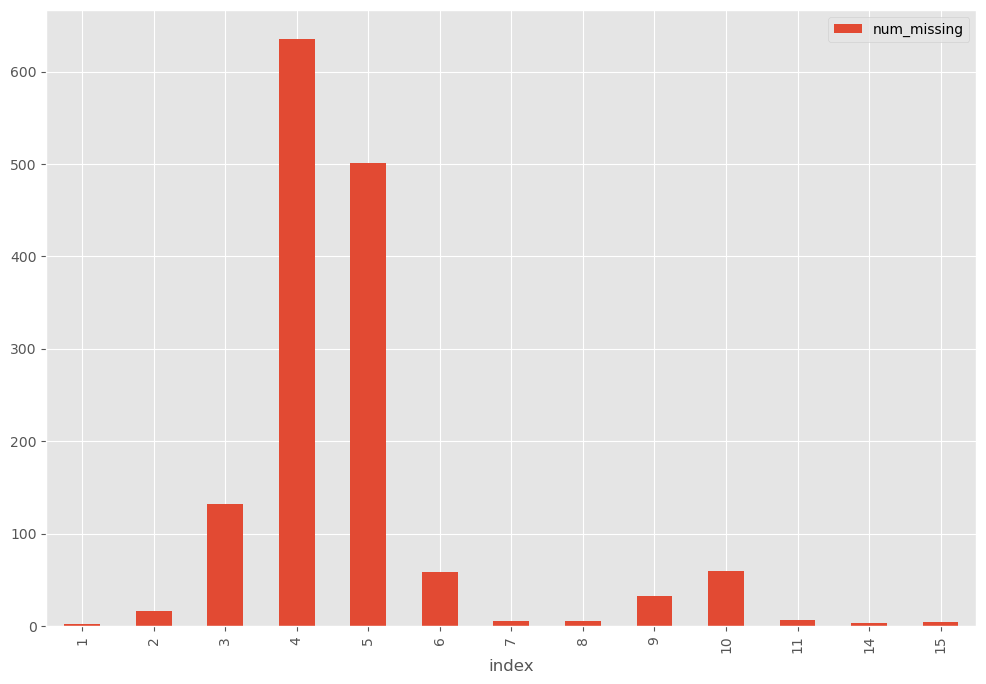

In [145]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

- From the histogram above, it is shown that there is NO observations **without** missing values
- Also, value of index **4** has the most missing values

In [146]:
# a function that calculates the percentage of missing values in numeric varibales that has missing values

df_missing_numeric = df_numeric[['LotFrontage','GarageYrBlt','MasVnrArea']].copy()
for col in df_missing_numeric.columns:
    pct_missing = np.mean(df_missing_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

LotFrontage - 18%
GarageYrBlt - 6%
MasVnrArea - 1%


<AxesSubplot:>

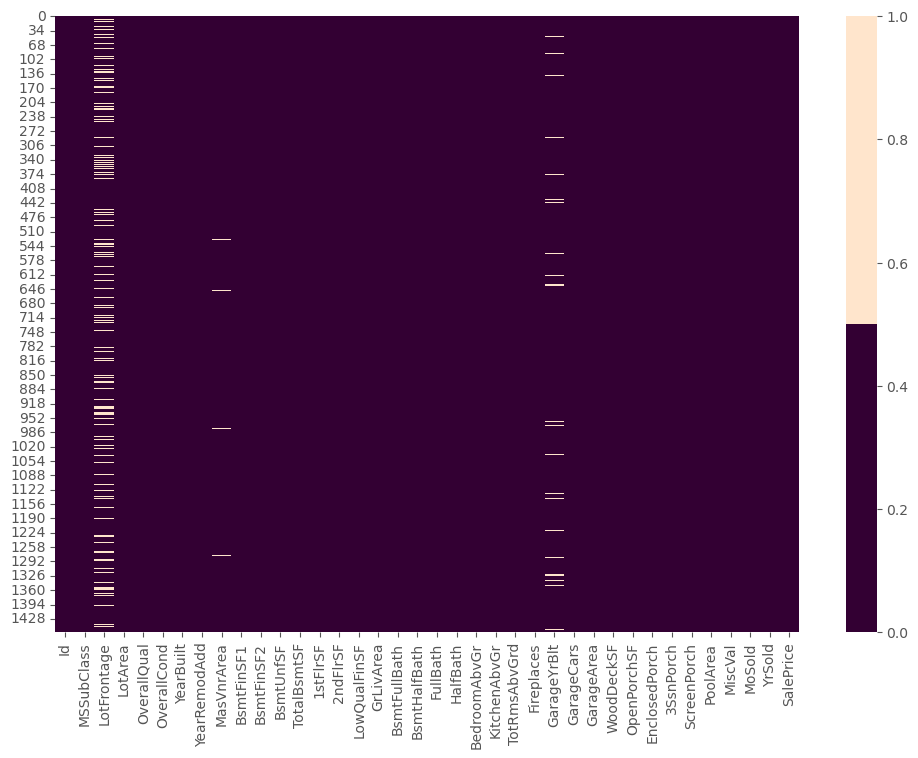

In [147]:
cols = df_numeric.columns[:39] # first 30 columns
colours = ['#330033', '#FFE5CC'] # specify the colours - beige is missing.  purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

- Change 'NA to 'none'

In [148]:
df_numeric['GarageYrBlt'] = df_numeric['GarageYrBlt'].fillna("None")

- since variables **LotFrontage** & **MasVnrArea**  have missing values, we can change it to a valuable information indicating its missing

In [149]:
df['LotFrontage'] = df['LotFrontage'].fillna(-999)
df['MasVnrArea'] = df['MasVnrArea'].fillna(-999)


From the heatmap of numerical columns, it is noticed that, variables:

 - **LotFrontage**:' Linear feet of street connected to property' | has **18%** of missing values

 - **GarageYrBlt**: 'Year garage was built' |  has **6%** of missing values because 'GarageType was NA'

 - **MasVnrArea**: 'Masonry veneer area in square feet' | has **1%** of missing values, because of the low percentage we could consider to fill the missing values


<AxesSubplot:>

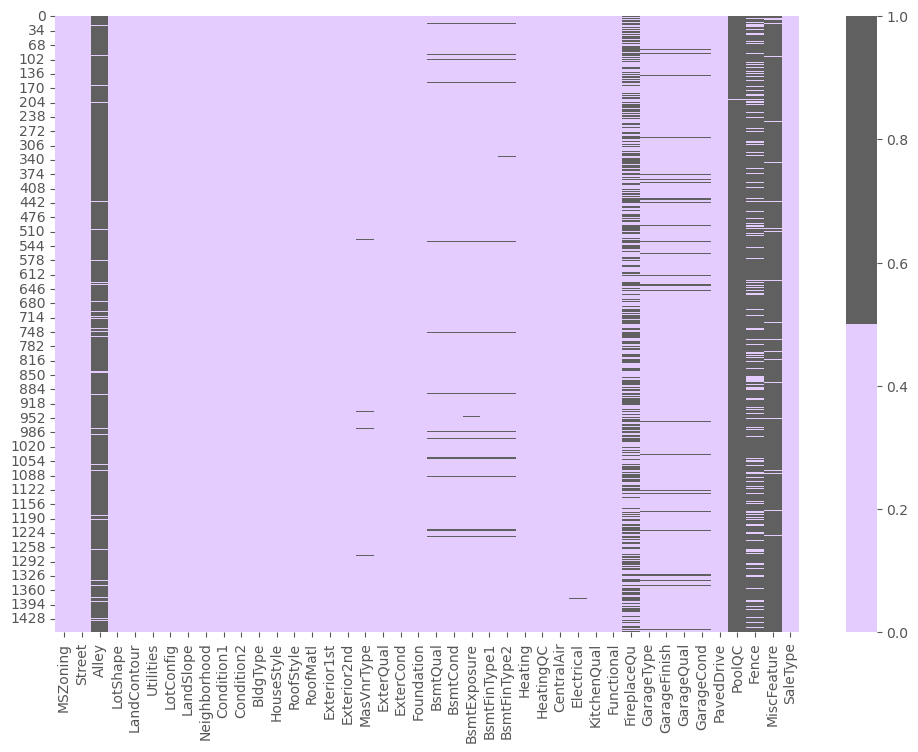

In [150]:
cols = df_non_numeric.columns[:42] # first 30 columns
colours = ['#E5CCFF', '#606060'] # specify the colours - grey is missing. purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

From the heatmap of non-numerical columns, it is noticed that, variables:
- **PoolQC**: 'Pool quality' !NA is no pool!
- **MiscFeature**: 'Miscellaneous feature not covered in other categories'
- **Fence**: 'Fence quality'
- **FireplaceQu**: 'Fireplace quality'
- **Alley**: 'Type of alley access to property'  

 has the most of missing values, while,
 
 - **GarageType**: 'Masonry veneer area in square feet' 
 - **GarageFinish**:'Interior finish of the garage'
 - **GarageQual**:'Garage quality'
 - **GarageCond**'Garage condition'
 
  of some properties share the same missing values
 and, 
 - **BsmtQual**:'Baement Quality'
 - **BsmtCond**: 'Basement condition'
 - **BsmtExposure**: ' Refers to walkout or garden level walls'
 - **BsmtFinType1**:'Rating of basement finished area'
 - **BsmtFinType2**:'Rating of basement finished area (if multiple types)' 

 of some properties share the same missing values
 and,
 
 - **MasVnrType**:'Masonry veneer type' 
 has few missing values that could be filled
 

In [151]:
# a function that calculates the percentage of missing values in non numeric varibales that has missing values as shown in the heat map

df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 100%
MiscFeature - 96%
Fence - 81%
FireplaceQu - 47%
Alley - 94%
GarageType - 6%
GarageFinish - 6%
GarageQual - 6%
GarageCond - 6%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinType2 - 3%
MasVnrType - 1%


- After inspection of high percentage variables , it was found that most them gave null because in the dataset they were given a value of 'NA' which was meant to be none
and python interepts NA as Null

 for this situation, NA can be changed to another value, for example 'None'




In [152]:

df_non_numeric['PoolQC'] = df_non_numeric['PoolQC'].fillna("None")
df_non_numeric['MiscFeature'] = df_non_numeric['MiscFeature'].fillna("None")
df_non_numeric['Fence'] = df_non_numeric['Fence'].fillna("None")
df_non_numeric['FireplaceQu'] = df_non_numeric['FireplaceQu'].fillna("None")
df_non_numeric['Alley'] = df_non_numeric['Alley'].fillna("None")
df_non_numeric['GarageType'] = df_non_numeric['GarageType'].fillna("None")
df_non_numeric['GarageCond'] = df_non_numeric['GarageCond'].fillna("None")
df_non_numeric['GarageFinish'] = df_non_numeric['GarageFinish'].fillna("None")
df_non_numeric['GarageQual'] = df_non_numeric['GarageQual'].fillna("None")
df_non_numeric['BsmtQual'] = df_non_numeric['BsmtQual'].fillna("None")
df_non_numeric['BsmtCond'] = df_non_numeric['BsmtCond'].fillna("None")
df_non_numeric['BsmtExposure'] = df_non_numeric['BsmtExposure'].fillna("None")
df_non_numeric['BsmtFinType1'] = df_non_numeric['BsmtFinType1'].fillna("None")
df_non_numeric['BsmtFinType2'] = df_non_numeric['BsmtFinType2'].fillna("None")
df_non_numeric['MasVnrType'] = df_non_numeric['MasVnrType'].fillna("None")

- check for missing values precentage in **non_numeric** after changing 'NA' to 'none'

In [153]:
df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 0%
MiscFeature - 0%
Fence - 0%
FireplaceQu - 0%
Alley - 0%
GarageType - 0%
GarageFinish - 0%
GarageQual - 0%
GarageCond - 0%
BsmtQual - 0%
BsmtCond - 0%
BsmtExposure - 0%
BsmtFinType1 - 0%
BsmtFinType2 - 0%
MasVnrType - 0%


In [154]:
df_non_numeric['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [155]:
df_non_numeric['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [156]:
df_non_numeric['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

- **AllPub** All utilities
- **NoSeWa** Electricity and Gas Only

- Check for missing values after handeling them in **df_numeric** & **df_non_numeric**

created missing indicator for: LotFrontage
created missing indicator for: MasVnrArea


<AxesSubplot:xlabel='index'>

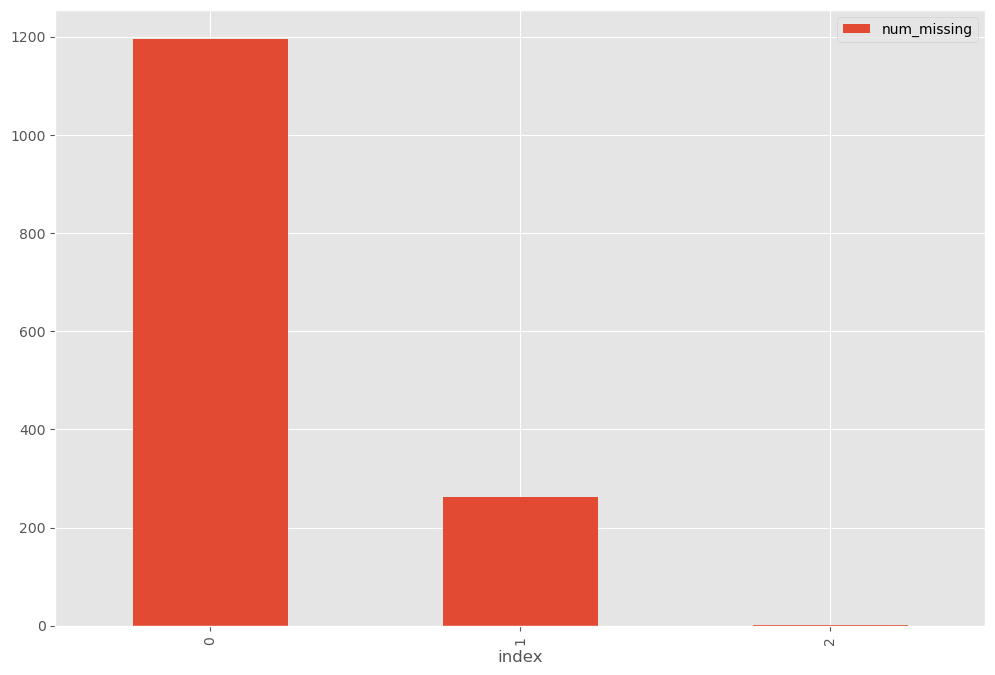

In [157]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df_numeric.columns:
    missing = df_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_numeric['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_numeric.columns if 'ismissing' in col]
df_numeric['num_missing'] = df_numeric[ismissing_cols].sum(axis=1)

df_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [158]:
df_numeric['MasVnrArea'].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

created missing indicator for: Electrical


<AxesSubplot:xlabel='index'>

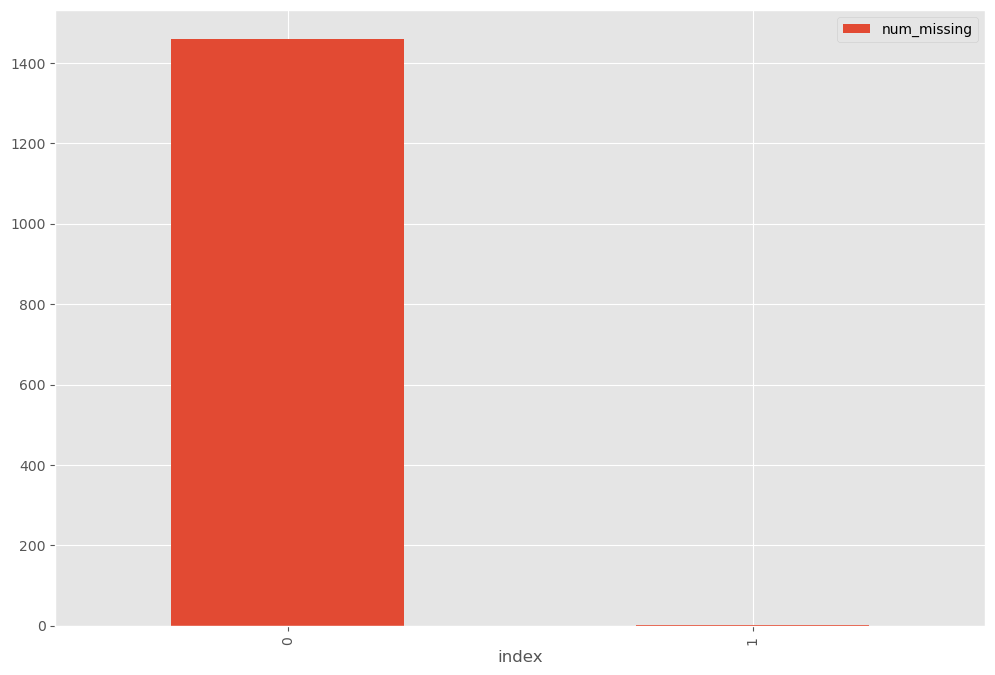

In [159]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df_non_numeric.columns:
    missing = df_non_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_non_numeric['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_non_numeric.columns if 'ismissing' in col]
df_non_numeric['num_missing'] = df_non_numeric[ismissing_cols].sum(axis=1)

df_non_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [160]:
df_non_numeric.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  None      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  None      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  None      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ        None     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y   None  None        None   
1          RFn         TA         TA          Y   None  None        None   
2          RFn         TA         TA          Y   None  None        None   
3          Unf         TA         TA          Y   None  None        None   
4          RFn         TA         TA          Y   None  None        None   

  SaleType SaleCondition  Electrical_ismissing  num_missing  
0       WD        Normal                 False            0  
1       WD        Normal                 False            0  
2       WD        Normal                 False            0  
3       WD       Abnorml                 False            0  
4       WD        Normal                 False            0

In [161]:
# df_handeled_missing  merge or not?

2- Check for **Outliers**
- Numerical

[Text(0, 0, 'MSSubClass'),
 Text(1, 0, 'LotFrontage'),
 Text(2, 0, 'LotArea'),
 Text(3, 0, 'OverallQual'),
 Text(4, 0, 'OverallCond'),
 Text(5, 0, 'YearBuilt'),
 Text(6, 0, 'YearRemodAdd'),
 Text(7, 0, 'MasVnrArea'),
 Text(8, 0, 'TotalBsmtSF'),
 Text(9, 0, '1stFlrSF'),
 Text(10, 0, '2ndFlrSF'),
 Text(11, 0, 'LowQualFinSF'),
 Text(12, 0, 'GrLivArea'),
 Text(13, 0, 'BsmtFullBath'),
 Text(14, 0, 'BsmtHalfBath'),
 Text(15, 0, 'FullBath'),
 Text(16, 0, 'HalfBath'),
 Text(17, 0, 'BedroomAbvGr'),
 Text(18, 0, 'KitchenAbvGr'),
 Text(19, 0, 'TotRmsAbvGrd'),
 Text(20, 0, 'Fireplaces'),
 Text(21, 0, 'GarageCars'),
 Text(22, 0, 'GarageArea'),
 Text(23, 0, 'WoodDeckSF'),
 Text(24, 0, 'OpenPorchSF'),
 Text(25, 0, 'EnclosedPorch'),
 Text(26, 0, '3SsnPorch'),
 Text(27, 0, 'ScreenPorch'),
 Text(28, 0, 'PoolArea'),
 Text(29, 0, 'MiscVal'),
 Text(30, 0, 'YrSold'),
 Text(31, 0, 'SalePrice')]

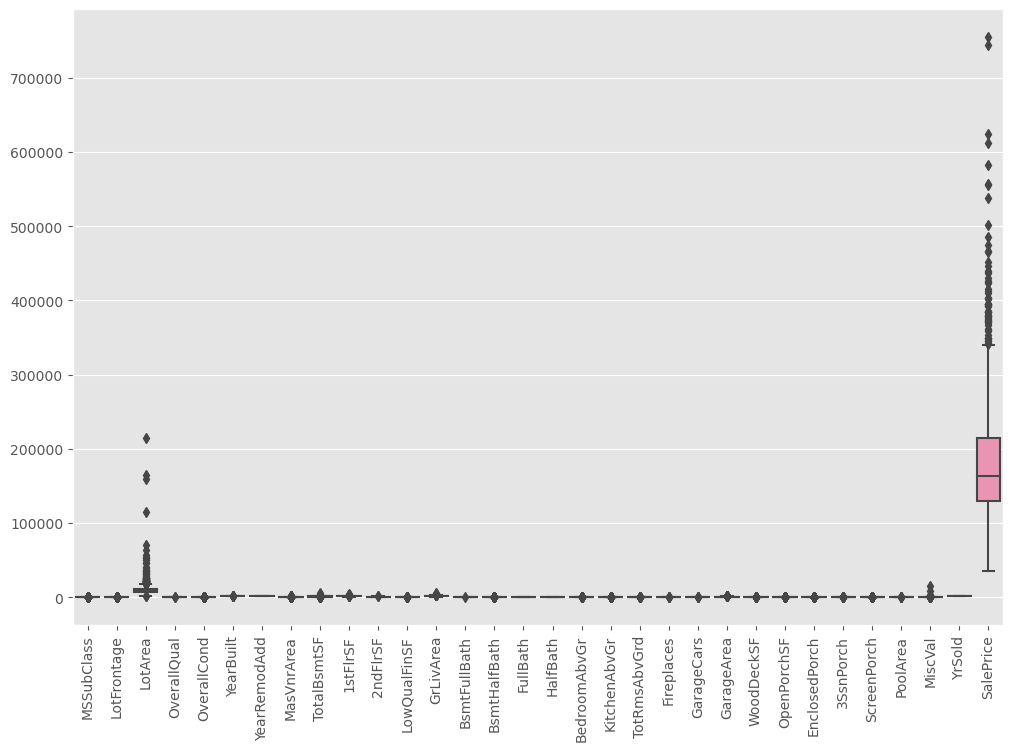

In [162]:
ax = sns.boxplot(data=df_numeric[[ 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual' ,'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
'TotalBsmtSF', '1stFlrSF' ,'2ndFlrSF', 'LowQualFinSF',
 'GrLivArea' ,'BsmtFullBath', 'BsmtHalfBath' ,'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd' ,'Fireplaces', 'GarageYrBlt',
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','YrSold',
 'SalePrice' ]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

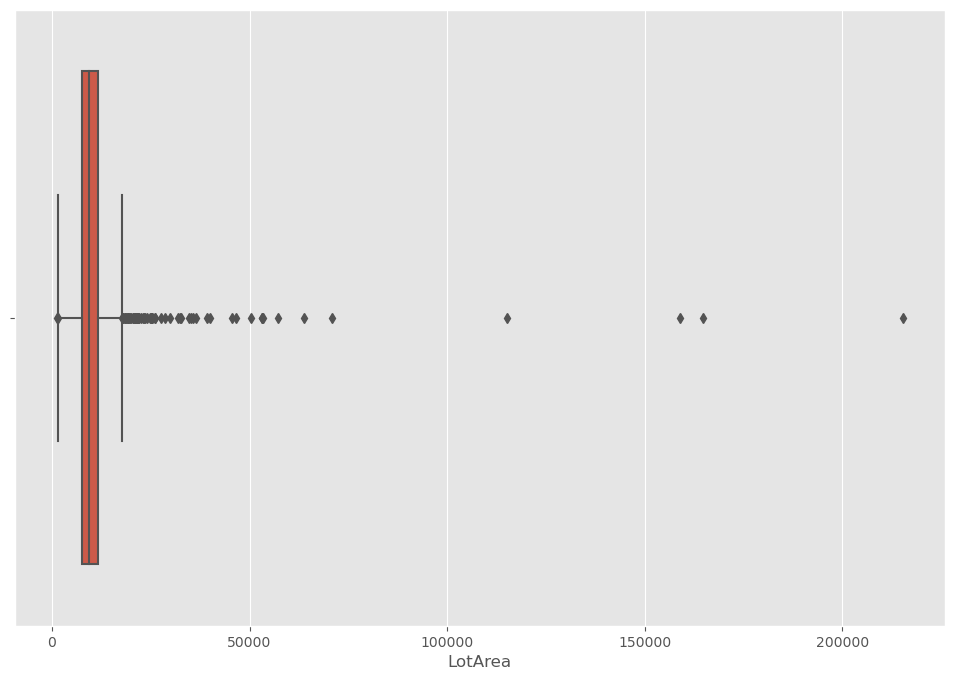

In [163]:
sns.boxplot(df['LotArea'])

In [164]:

# Position of the Outlier
print(np.where(df_numeric['LotArea']>50000))

(array([  53,  249,  313,  335,  384,  451,  457,  706,  769, 1298, 1396],
      dtype=int64),)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual'>

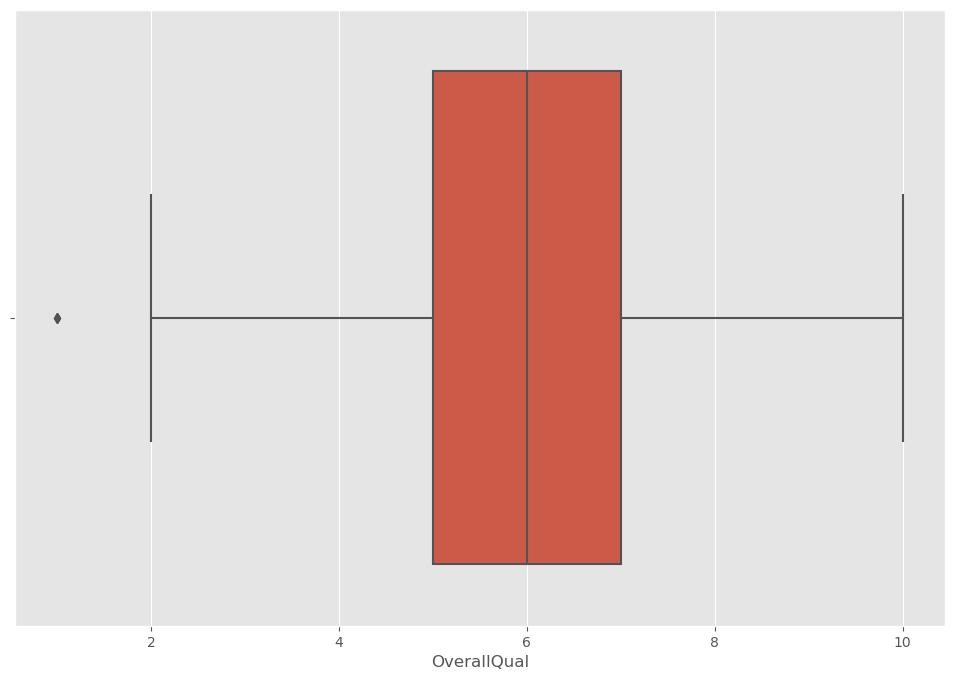

In [165]:
sns.boxplot(df['OverallQual'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallCond'>

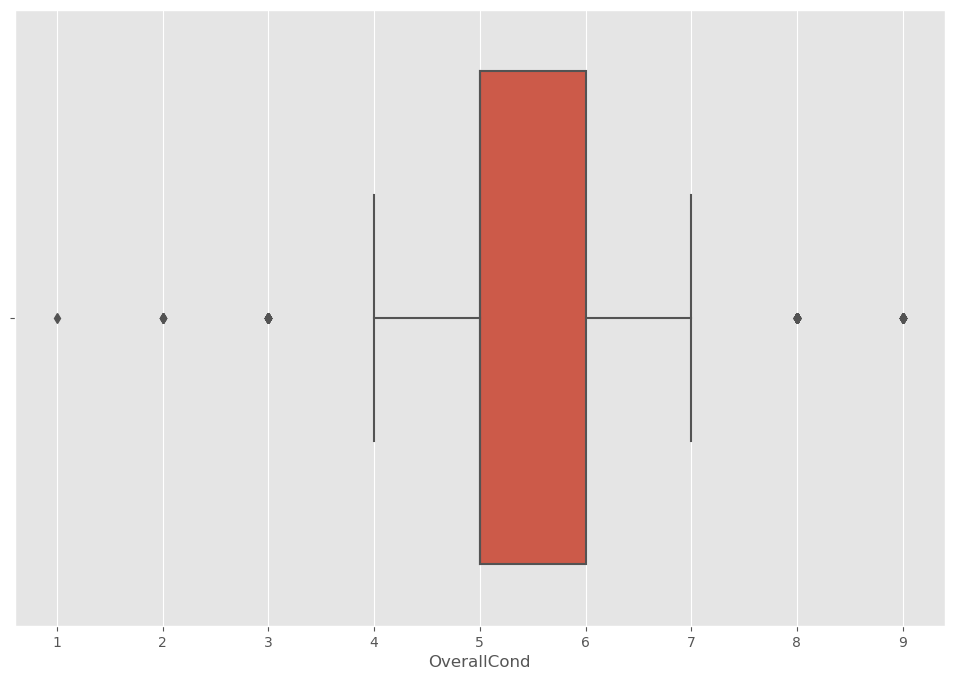

In [166]:
sns.boxplot(df['OverallCond'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

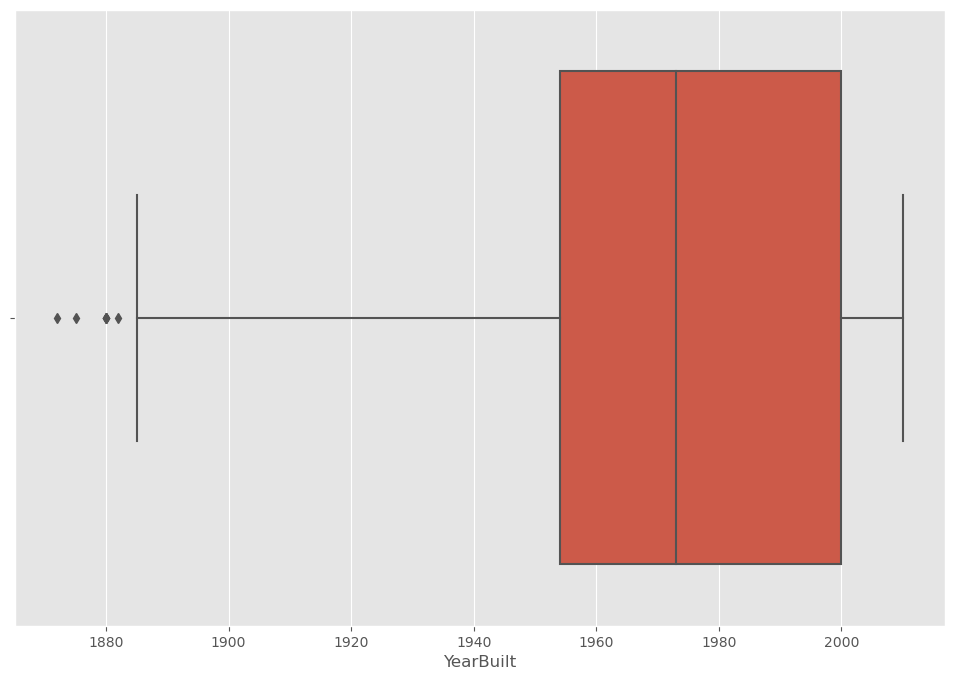

In [167]:
sns.boxplot(df['YearBuilt'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea'>

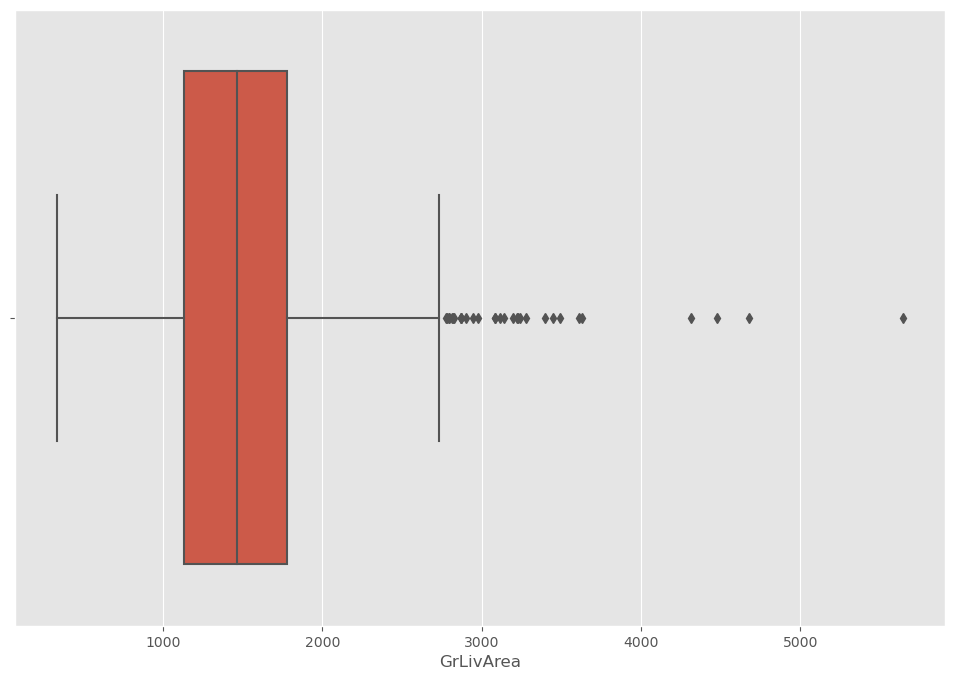

In [168]:
sns.boxplot(df['GrLivArea'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

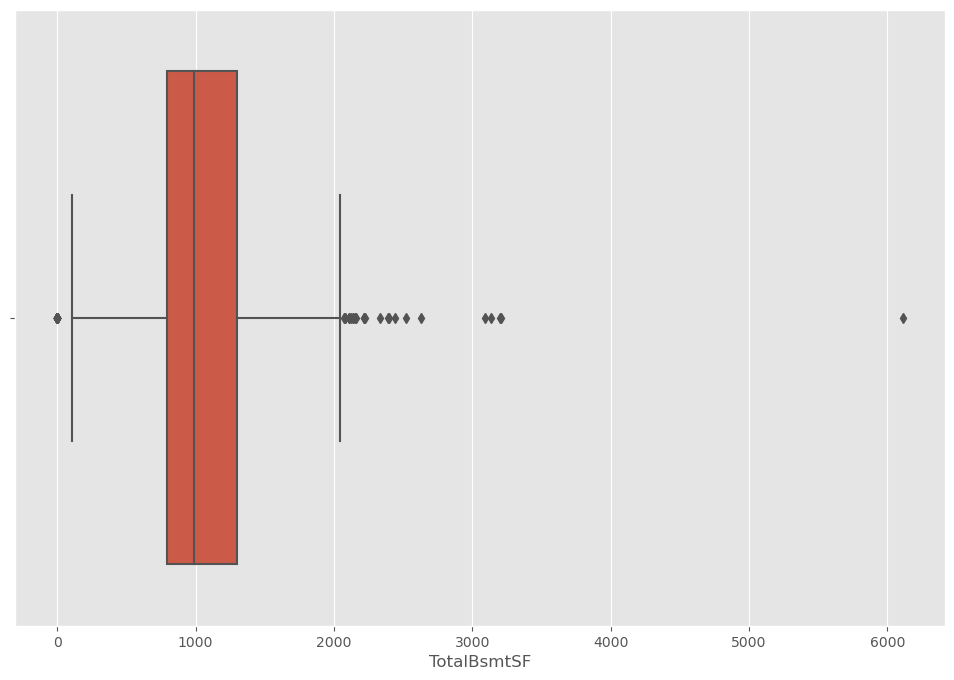

In [169]:
sns.boxplot(df['TotalBsmtSF'])

In [170]:
sns.boxplot(df['SalePrice'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

- Data in the boxplots that are outside the skewers are acting as outliers


In [171]:

''' Detection '''
# IQR
Q1 = np.percentile(df_numeric['SalePrice'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_numeric['SalePrice'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_numeric.shape)
 
# Upper bound
upper = np.where(df_numeric['SalePrice'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_numeric['SalePrice'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_numeric.drop(upper[0], inplace = True)
df_numeric.drop(lower[0], inplace = True)
 
print("New Shape: ", df_numeric.shape)

Old Shape:  (1460, 41)
New Shape:  (1399, 41)


In [172]:
df_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0      2003.0           2         548           0           61              0   
1      1976.0           2         460         298            0              0   
2      2001.0           2         608           0           42              0   
3      1998.0           3         642           0           35            272   
4      2000.0           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0          0            0         0        0       2    2008     208500   
1          0            0         0        0       5    2007     181500   
2          0            0         0        0       9    2008     223500   
3          0            0         0        0       2    2006     140000   
4          0            0         0        0      12    2008     250000   

   LotFrontage_ismissing  MasVnrArea_ismissing  num_missing  
0                  False                 False            0  
1                  False                 False            0  
2                  False                 False            0  
3                  False                 False            0  
4                  False                 False            0

In [173]:
df_numeric.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1399.000000  1399.000000  1143.000000    1399.000000  1399.000000   
mean    733.508935    57.487491    69.058618   10155.280915     5.983560   
std     422.811873    42.803603    23.813289    8324.834198     1.282272   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     367.500000    20.000000    59.000000    7442.000000     5.000000   
50%     739.000000    50.000000    68.000000    9317.000000     6.000000   
75%    1098.500000    70.000000    80.000000   11316.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1399.000000  1399.000000   1399.000000  1392.000000  1399.000000   
mean      5.591137  1970.080772   1984.058613    90.176724   417.333095   
std       1.118236    30.009463     20.661160   159.492384   428.401771   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1971.000000   1992.000000     0.000000   370.000000   
75%       6.000000  1999.000000   2003.000000   144.000000   686.000000   
max       9.000000  2009.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1399.000000  1399.000000  1399.000000  1399.000000  1399.000000   
mean     47.478914   559.461758  1024.273767  1132.247320   336.476054   
std     162.648530   429.378909   407.031806   357.318243   421.440524   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   218.000000   788.000000   870.500000     0.000000   
50%       0.000000   476.000000   973.000000  1069.000000     0.000000   
75%       0.000000   807.000000  1251.500000  1346.500000   720.000000   
max    1474.000000  2042.000000  6110.000000  4692.000000  1818.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1399.000000  1399.000000   1399.000000   1399.000000  1399.000000   
mean       5.690493  1474.413867      0.410293      0.058613     1.540386   
std       47.292646   480.552421      0.514797      0.240995     0.537219   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1119.000000      0.000000      0.000000     1.000000   
50%        0.000000  1437.000000      0.000000      0.000000     2.000000   
75%        0.000000  1728.000000      1.000000      0.000000     2.000000   
max      528.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1399.000000   1399.000000   1399.000000   1399.000000  1399.000000   
mean      0.370264      2.862044      1.048606      6.416726     0.583274   
std       0.500503      0.806081      0.224874      1.544766     0.631804   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1399.000000  1399.000000  1399.000000  1399.000000    1399.000000   
mean      1.717655   458.817012    89.621158    44.892066      22.378127   
std       0.721365   204.278673   121.798431    65.718951      61.454480   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   312.000000     0.000000     0.000000       0.000000   
50%       2.000000   471.000000     0.000000    22.000000       0.000000   
75%       2.000000   573.000000   165.000000    64.000000       0.00

- from describe, 4 group plots were created depending on the variables scale

In [202]:
df_G1 = df_numeric[[ 'LotFrontage', 'LowQualFinSF' , 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch','PoolArea' ]].copy()
df_G2 = df_numeric[['BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','MasVnrArea']].copy()
df_G3 = df_numeric[['LotArea','MiscVal']].copy()
df_G4 = df_numeric[['SalePrice']].copy()

<AxesSubplot:>

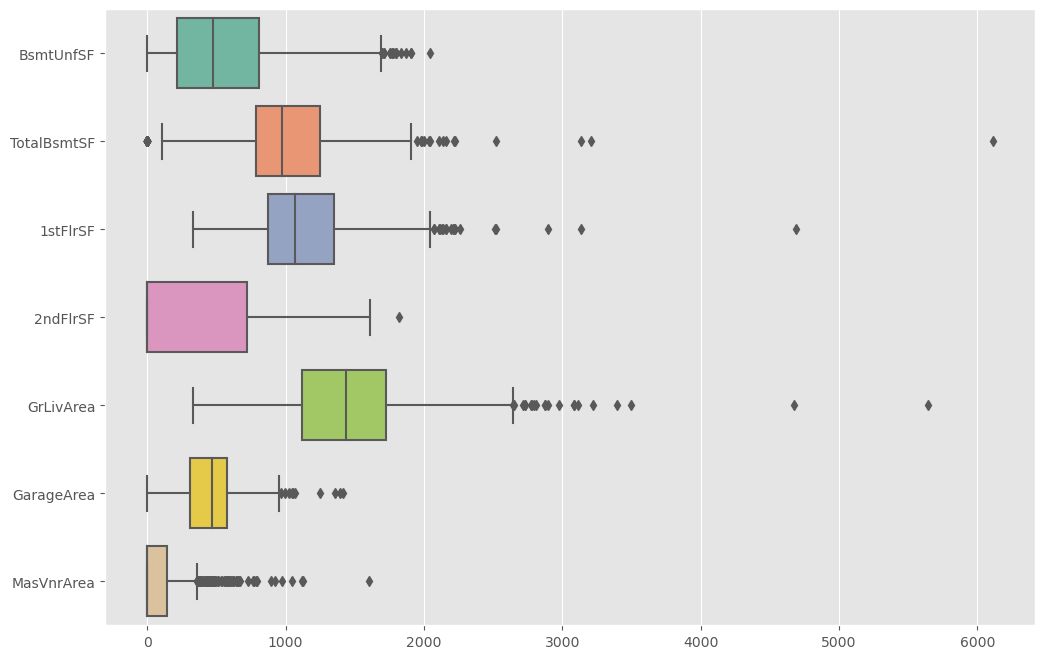

In [203]:
sns.boxplot(data=df_G2, orient="h", palette="Set2")

<AxesSubplot:>

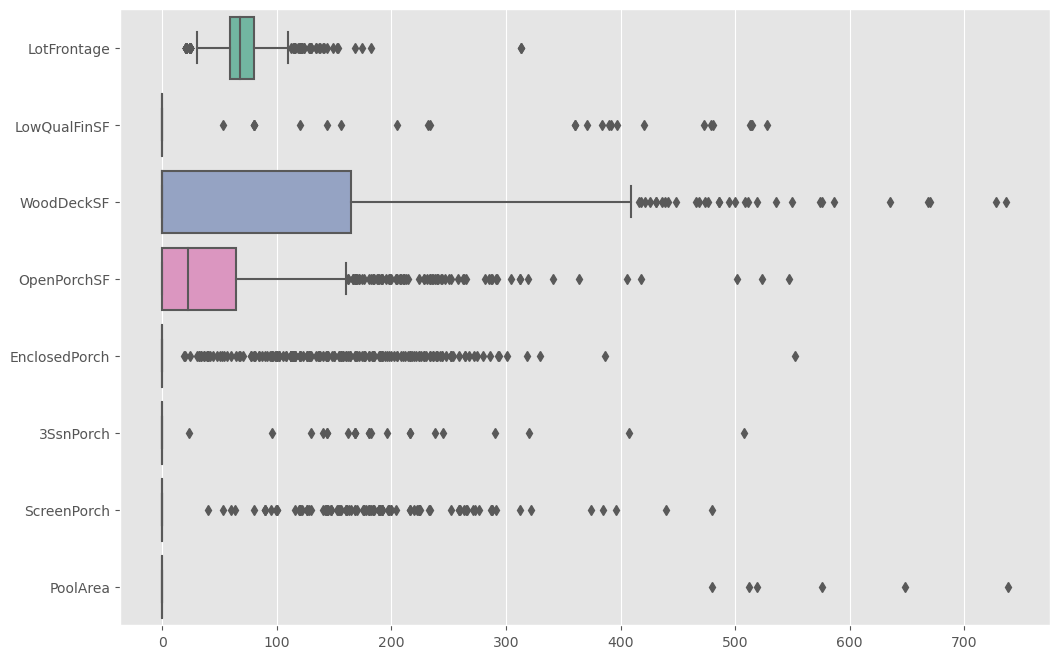

In [200]:
sns.boxplot(data=df_G1, orient="h", palette="Set2")

<AxesSubplot:>

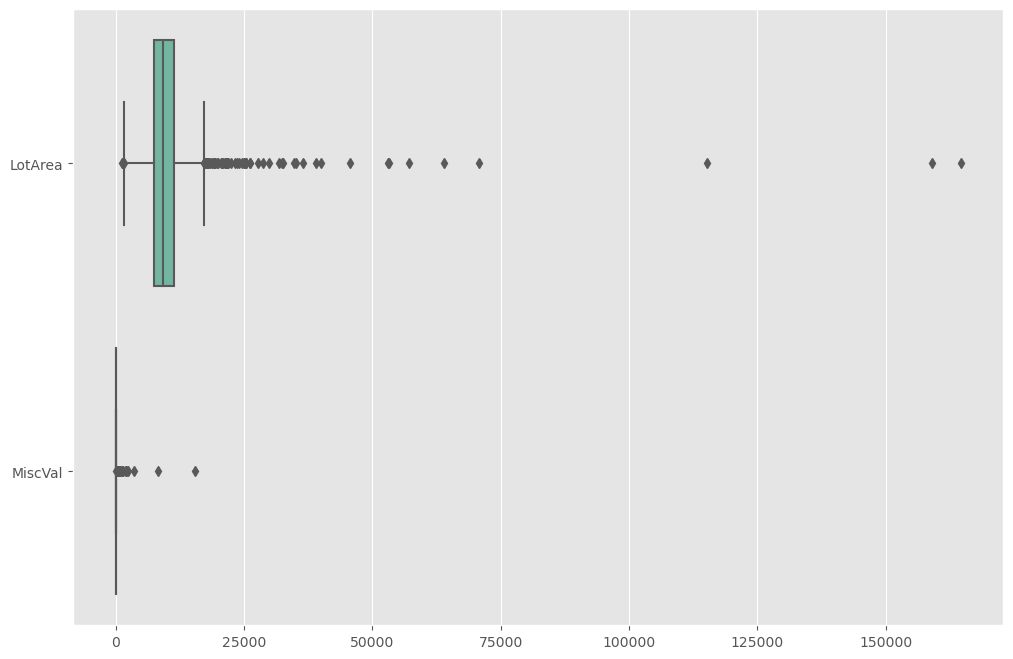

In [199]:
sns.boxplot(data=df_G3, orient="h", palette="Set2")

- From the data frame above, we can detect outliers comparint the mean with its max value,
for example,
 - pool area mean = 2 while max = 783


In [174]:
sns.displot(df_numeric['SalePrice'], color='g', bins=10)


In [175]:
sns.displot(df_numeric['YearBuilt'], color='g', bins=10)

In [176]:
plt.scatter(df_numeric['SalePrice'],df_numeric['OverallCond'])
plt.title('Sale Price vs. overall condition of the house')

Text(0.5, 1.0, 'Sale Price vs. overall condition of the house')

Text(0.5, 1.0, 'Sale Price vs. overall material and finish of the house')

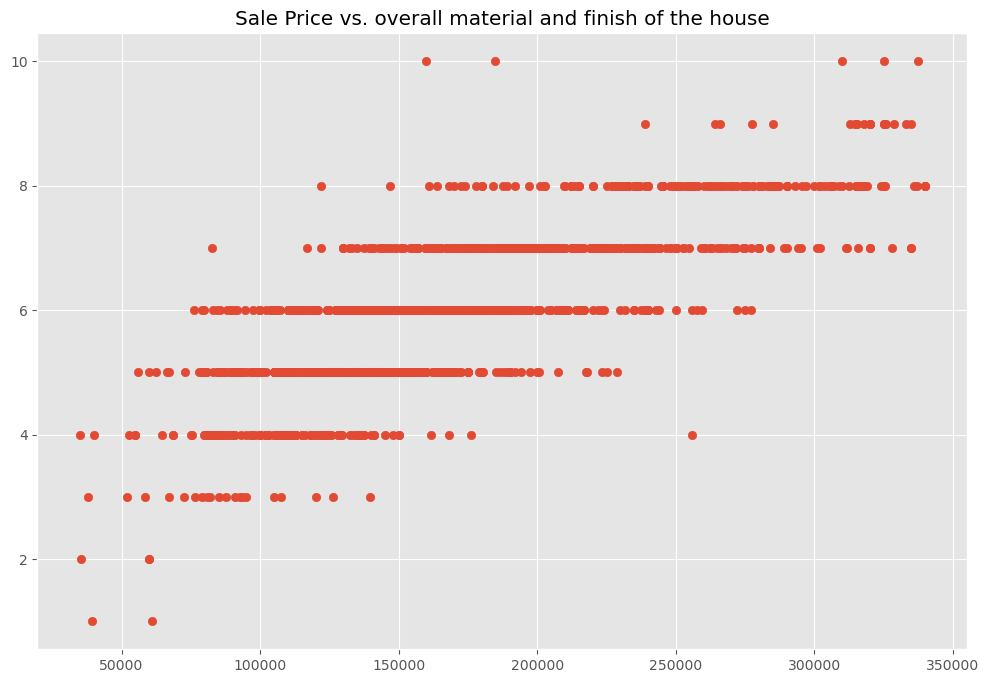

In [177]:
plt.scatter(df_numeric['SalePrice'],df_numeric['OverallQual'])
plt.title('Sale Price vs. overall material and finish of the house')

Text(0.5, 1.0, 'Sale Price vs. Pool Area - 0=No Pool')

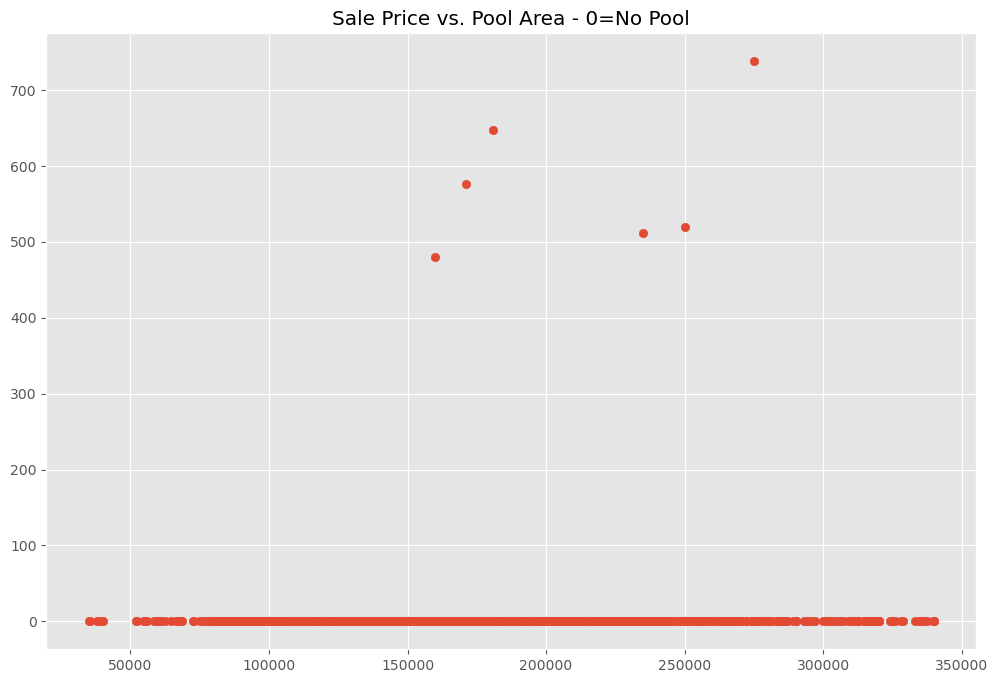

In [178]:
plt.scatter(df_numeric['SalePrice'],df_numeric['PoolArea'])
plt.title('Sale Price vs. Pool Area - 0=No Pool')

In [179]:
plt.scatter(df_numeric['SalePrice'],df_numeric['TotalBsmtSF'])
plt.title('Sale Price vs. Total square feet of basement area')

Text(0.5, 1.0, 'Sale Price vs. Total square feet of basement area')

Text(0.5, 1.0, 'Sale Price vs. Lot size in square feet')

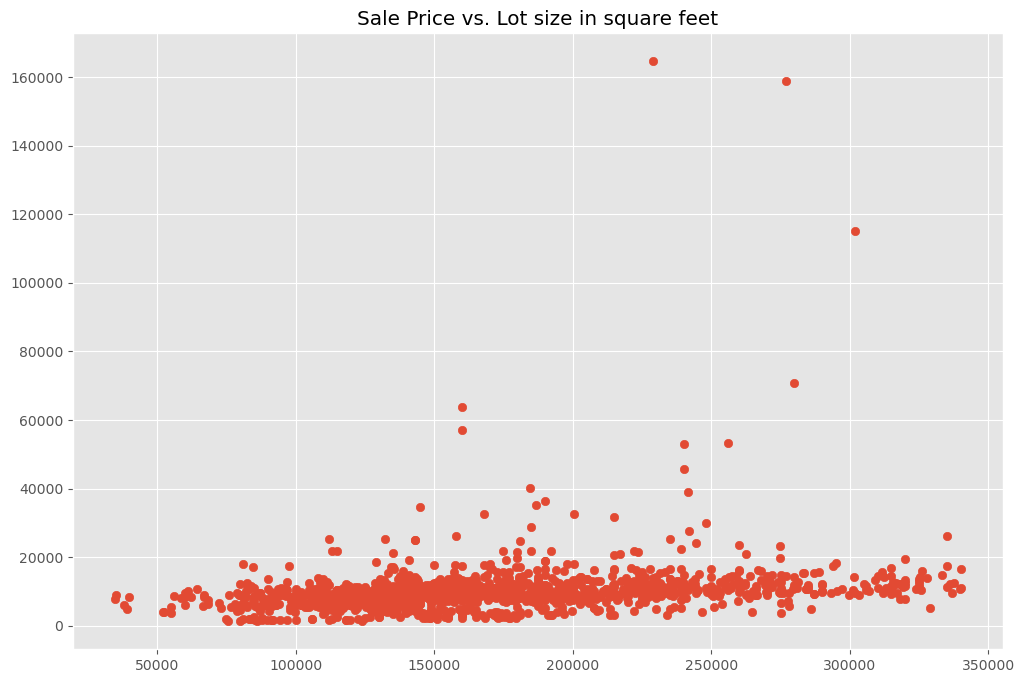

In [180]:
plt.scatter(df_numeric['SalePrice'],df_numeric['LotArea'])
plt.title('Sale Price vs. Lot size in square feet')

In [181]:
plt.scatter(df_numeric['SalePrice'],df_numeric['LotFrontage'])
plt.title('Sale Price vs. Linear feet of street connected to property')

Text(0.5, 1.0, 'Sale Price vs. Linear feet of street connected to property')

In [182]:
plt.scatter(df_numeric['SalePrice'],df_numeric['1stFlrSF'])
plt.title('Sale Price vs. First Floor square feet')

Text(0.5, 1.0, 'Sale Price vs. First Floor square feet')

In [183]:
plt.scatter(df_numeric['SalePrice'],df_numeric['2ndFlrSF'])
plt.title('Sale Price vs. Second Floor square feet')

Text(0.5, 1.0, 'Sale Price vs. Second Floor square feet')

Text(0.5, 1.0, 'Sale Price vs. Total rooms above grade (does not include bathrooms)')

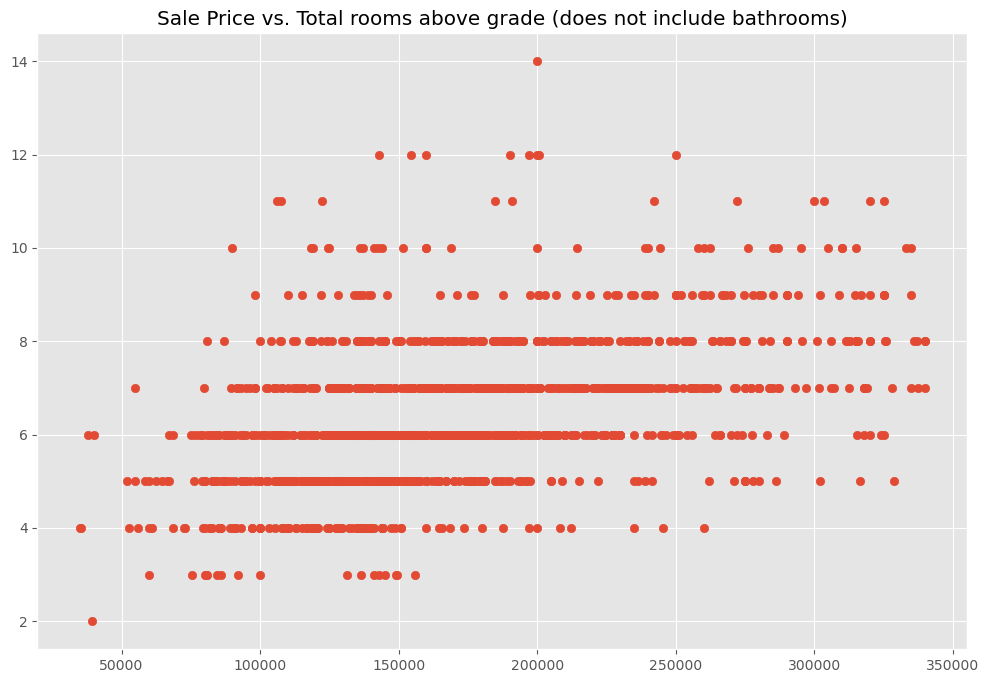

In [184]:
plt.scatter(df_numeric['SalePrice'],df_numeric['TotRmsAbvGrd'])
plt.title('Sale Price vs. Total rooms above grade (does not include bathrooms)')

Text(0.5, 1.0, 'Sale Price vs. Size of garage in car capacity')

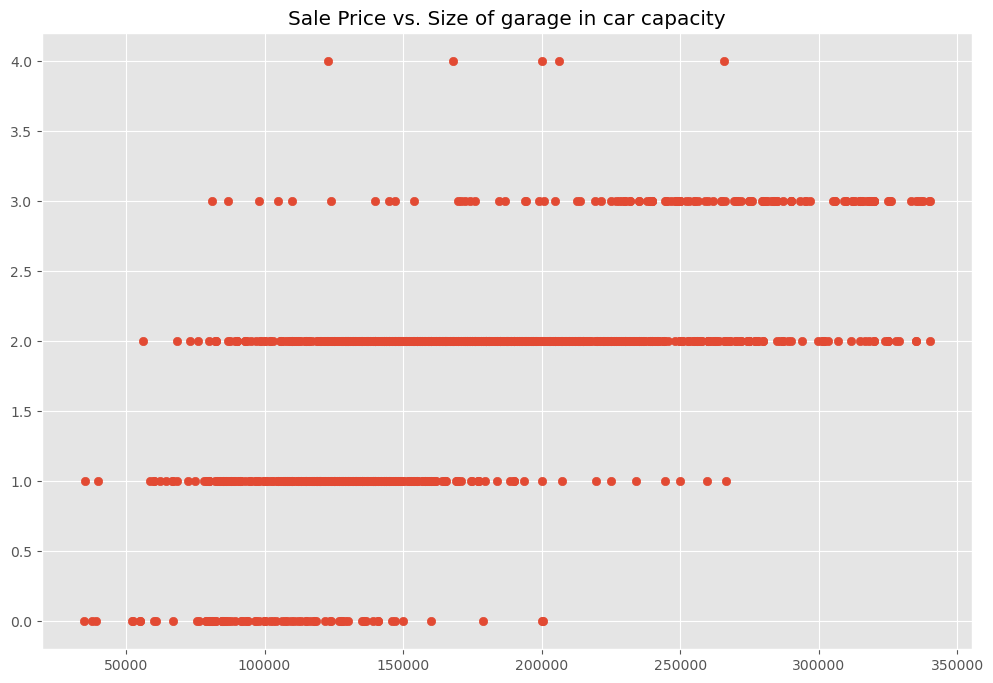

In [185]:
plt.scatter(df_numeric['SalePrice'],df_numeric['GarageCars'])
plt.title('Sale Price vs. Size of garage in car capacity')

In [186]:
plt.scatter(df_numeric['SalePrice'],df_numeric['WoodDeckSF'])
plt.title('Sale Price vs. Wood deck area in square feet')

Text(0.5, 1.0, 'Sale Price vs. Wood deck area in square feet')

In [187]:
plt.scatter(df_numeric['SalePrice'],df_numeric['OpenPorchSF'])
plt.title('Sale Price vs. Open porch area in square feet')

Text(0.5, 1.0, 'Sale Price vs. Open porch area in square feet')

- correlation of sale price with selected numerical features

In [188]:
df_numerical_features = df_numeric[[ 'LotFrontage', 'LotArea', 'OverallQual' ,'OverallCond',
 'YearBuilt',  
'TotalBsmtSF', '1stFlrSF' ,'2ndFlrSF',
 'GrLivArea' ,'BsmtFullBath', 'BsmtHalfBath' ,'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea',
 'SalePrice' ]].copy()
 

In [189]:
dataplot = sns.heatmap(df_numerical_features.corr(), cmap="PiYG", annot=True)

In [190]:
sns.pairplot(df_numerical_features)

- the max of **LotFrontage** is 313 while the 25% is 59
- the max of **salesprice** is 755000 while the 25% is 129975

- Non-numerical